# Data Structures

## 1. Lists -- Linked Lists

In [1]:
class Node:
    def __init__(self, data):
        self.data = data
        self.prev = None
        self.next = None

In [18]:
class LinkedList:
    def __init__(self):           
        self.head = None
        self.tail = None
        self.length = 0
        
    def append(self, data):
        new_node = Node(data)
        
        if self.length == 0:
            self.head = self.tail = new_node  
        else:
            self.tail.next = new_node
            new_node.prev = self.tail
            self.tail = new_node
        self.length += 1
        
    def __iter__(self):
        self._iter_node = self.head
        return self
            
    def __next__(self):
        if self._iter_node is None:
            raise StopIteration
        ret = self._iter_node.data
        self._iter_node = self._iter_node.next
        return ret
    
    def prepend(self, data):
        new_node = Node(data)
        
        if self.length == 0:
            self.head = self.tail = new_node
        else:
            self.head.prev = new_node
            new_node.next = self.head
            self.head = new_node
        self.length += 1
        
    def __len__(self):
        
        return self.length
        
    def __str__(self):
        
        return str([value for value in self])  
        

In [20]:
lst = LinkedList()
print(lst)

lst.append(7)
print(lst, len(lst))

lst.append(5)
print(lst, len(lst))

lst.append(9)
print(lst, len(lst))

[]
[7] 1
[7, 5] 2
[7, 5, 9] 3


## 2. Queues

Fisrt in Fisrt out data structure (FIFO).

Queue is opposite the list, the Head of a list is the back of the queue, and vice verse.


In [25]:
class Queue(LinkedList):
    
    def enqueue(self,data):
        self.prepend(data)
        
    def get_front(self):
        return self.tail.data
    
    def dequeue(self):
        ret = self.tail.data
        
        if self.length ==1:
            self.head = self.tail = None
        else:
            self.tail = self.tail.prev
            self.tail.next = None
        self.length -= 1
        
        return ret

In [26]:
queue = Queue()

for i in [1,2,3,4]:
    queue.enqueue(i)
print(queue)    

[4, 3, 2, 1]


In [27]:
front = queue.dequeue()
front

1

**Example of the usage of queues**

Our queue implementation is now complete. Queues have many applications. We use them in the implementation of several algorithms, such as calculating the fastest way to go from one location to another on a map.

Another important application of queues is scheduling requests on a single shared resource such as a printer or a CPU. Imagine that we have a computer with a single CPU. Tasks need processing but we can only process one task at a time. We're assuming that the system is non-preemptive, which means that once a task is started, it won't be interrupted until it's finished.

There are several algorithms for scheduling the tasks in a non-preemptive system. One of them is FCFS, which stands for first come, first served. The idea is that tasks are processed in the same order as they arrive — like people in a supermarket.

Since queues are FIFO (first in, first out) data structures, they are ideal for implementing FCFS process scheduling. In practice, when a task arrives, if the CPU is free, then the task immediately undergoes processing. Otherwise, the task gets added to a queue. Whenever the CPU finishes processing a task, the task at the front of the queue gets processed next.

In [28]:
import pandas as pd
processes = pd.read_csv('processes.csv', index_col = 'Pid')
processes.shape

cur_time = 0
num_processes_done = 0
wait_queue = Queue()
cur_pid = None

# Copy and paste tempalte code here
while num_processes_done < processes.shape[0]:
    if cur_pid is not None:
        if processes.loc[cur_pid,'Start']+processes.loc[cur_pid, 'Duration'] == cur_time:
            processes.loc[cur_pid, 'End'] = cur_time
            cur_pid = None
            num_processes_done +=1
    
    ready_processes = processes[processes['Arrival'] == cur_time]
    for pid in ready_processes.index:
        wait_queue.enqueue(pid)
        
    if cur_pid is None and len(wait_queue)>0:
        cur_pid = wait_queue.dequeue()
        processes.loc[cur_pid,'Start'] = cur_time
        
    cur_time += 1 

In [29]:
processes.head()

,Arrival,Duration,Start,End
Pid,,,,
P1,2,2,2.0,4.0
P2,0,1,0.0,1.0
P3,3,3,4.0,7.0
P4,3,5,7.0,12.0
P5,4,4,12.0,16.0


## 3. stacks

Stacks work in the opposite manner when it comes to processing order. Imagine a restaurant with a single person washing dishes. Dishes get stacked into a single pile. To wash a dish, the washer takes the dish from the top of the stack and cleans it. Since new plates get put on the top of the pile, the washer cleans those plates that arrived most recently first first.

In a stack, the last plate to arrive will be the first one washed. For this reason, in programming, we call stacks a **last-in, first-out (LIFO)** data structure.

In [30]:
class Stack(LinkedList):
    def push(self,data):
        self.append(data)
    
    # release the last data first
    def peek(self):
        return self.tail.data
    
    # a method that removes and retrieves the top of the stack -- pop
    def pop(self):
        ret = self.tail.data
        if self.length ==1:
            self.head = self.tail = None
        else:
            self.tail = self.tail.prev
            self.tail.next = None
        self.length -= 1
        return ret

In [31]:
stack = Stack()
for i in [1,3,5,7,9]:
    stack.push(i)
print('Original stack: ', stack)

pop = stack.pop()
print('The first pop value: ', pop)

peek = stack.peek()
print('Remain peek value: ', peek)
    

Original stack:  [1, 3, 5, 7, 9]
The first pop value:  9
Remain peek value:  7


use the LIFO algorithm to handle the previous task

In [33]:
cur_time = 0
num_processes_done = 0
wait_stack = Stack()
cur_pid = None

while num_processes_done < processes.shape[0]:
    if cur_pid is not None:
        if processes.loc[cur_pid, 'LIFO Start'] + processes.loc[cur_pid, 'Duration'] == cur_time:
            processes.loc[cur_pid,'LIFO End'] = cur_time
            cur_pid = None
            num_processes_done += 1
     
    ready_processes = processes[processes['Arrival'] == cur_time]
    
    for idx in ready_processes.index:
        wait_stack.push(idx)
        
    if cur_pid is None and len(wait_stack) > 0:
        cur_pid = wait_stack.pop()
        processes.loc[cur_pid, 'LIFO Start'] = cur_time
        
    cur_time += 1    

In [34]:
processes.head()

,Arrival,Duration,Start,End,LIFO Start,LIFO End
Pid,,,,,,
P1,2,2,2.0,4.0,2.0,4.0
P2,0,1,0.0,1.0,0.0,1.0
P3,3,3,4.0,7.0,13.0,16.0
P4,3,5,7.0,12.0,8.0,13.0
P5,4,4,12.0,16.0,4.0,8.0


In [37]:
processes['LIFO Wait'] = processes['LIFO Start'] - processes['Arrival']
LIFO_average_wait_time = processes['LIFO Wait'].mean()
print('LIFO Algorithm average wait time is: ',LIFO_average_wait_time )

processes['FIFO Wait'] = processes['Start'] - processes['Arrival']
FIFO_average_wait_time = processes['FIFO Wait'].mean()
print('FIFO Algorithm average wait time is: ',FIFO_average_wait_time )

LIFO Algorithm average wait time is:  250.6
FIFO Algorithm average wait time is:  248.55238095238096


## 4. Dictionary

If mapped to a hash table with five buckets, they both go to bucket index 2 since both 0141439742 % 5 and 0375757422 % 5 are equal to 2. We call this a **collision**. There are several ways to overcome this. We're going to use an idea called **separate chaining**.
The process of transforming an object into an integer is called **hashing**.

In [70]:
class Entry:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        
        
class Dictionary:
    def __init__(self, num_buckets):
        self.num_buckets = num_buckets
        self.buckets = [LinkedList() for _ in range(num_buckets)]
        self.length = 0
     
    def _get_index(self, key):
        hashcode = hash(key) % self.num_buckets
        return hashcode
     
    def put(self, key, value):
        index = self._get_index(key)
        found_key = False
        for entry in self.buckets[index]:
            if entry.key == key:
                entry.value = value
                found_key = True
        if not found_key:
            entry = Entry(key, value)
            self.buckets[index].append(entry)
            self.length += 1
            
    def get_value(self, key):
        index = self._get_index(key)
        for entry in self.buckets[index]:
            if entry.key == key:
                return entry.value
        raise KeyError(key)
    
    def delete(self, key):
        index = self._get_index(key)
        new_bucket = LinkedList()
        
        for entry in self.buckets[index]:
            if entry.key != key:
                new_bucket.append(entry)
        if len(new_bucket) < len(self.buckets[index]):
            self.length -= 1
        self.buckets[index] = new_bucket  
        
        
    def __getitem__(self, key):
        return self.get_value(key)
        
    def __setitem__(self, key, value):
        return self.put(key, value)
        
    def __len__(self):
        return self.length
               

In [71]:
my_dict=Dictionary(5)
my_dict.put("my key", 1) 
my_dict.get_value('my key')

1

In [72]:
my_dict.put('my key', 2)
my_dict.get_value('my key')

2

In [73]:
my_dict.delete('my key')
my_dict.length

0

In [74]:
my_dict = Dictionary(5)
my_dict["my key"] = 2
print(my_dict["my key"])
print(len(my_dict))

2
1


If we used a random hash function, each bucket would be equally likely to be selected and the expected size of each list would be the number of entries N divided by the number of buckets B:

                                      N/B
  
We call this ratio the **load factor** of the hash table. If B > N then N / B < 1, all operations would have time complexity O(N / B) = O(1). Unfortunately, we cannot use random hash codes because we need to ensure that two instances of the same object return the same hash code.


A lot of research has gone into developing good hash functions, making them behave like random numbers. When using the hash() function, we can often assume that the hash codes are evenly spread. Therefore, if we keep B large enough, we get constant time complexity for all dictionary operations.


To ensure that the load factor stays below one, we need to increase the number of buckets, B, when N becomes too close to B. Since the bucket index of the entries depends on B, when we change it, we need to reinsert all entries back into the dictionary. We call this process rehashing.

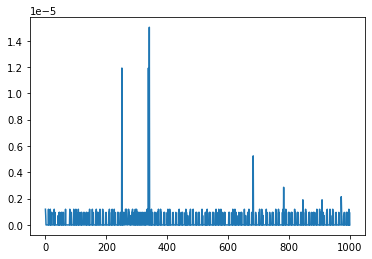

In [75]:
import matplotlib.pyplot as plt
def plot_times(times):
    plt.plot(times)
    plt.show()

import time
import random
random.seed(0)

times = []
number_of_entries = 1000
keys = range(number_of_entries)

d = dict()


for key in keys:
    start = time.time()
    d[key] = key
    end = time.time()
    times.append(end-start)
plot_times(times)        

Let's see how many empty buckets ammongall of the buckets

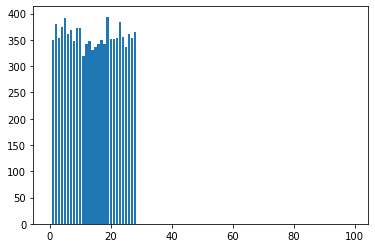

In [76]:
def plot_buckets_sizes(dictionary):
    plt.bar(range(100), [len(dictionary.buckets[i]) for i in range(100)])
    plt.show()
    
import pandas as pd
employees = pd.read_csv("employees.csv", index_col="Id")

# Add code here
dictionary = Dictionary(100)
for identifier, data in employees.iterrows():
    dictionary[identifier] = data
    
plot_buckets_sizes(dictionary)  